<a href="https://colab.research.google.com/github/topdeveloppement/ai-nexus-one-machine-learning/blob/main/regression_lineaire_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/topdeveloppement/ai-nexus-one-machine-learning/blob/main/ml.jpeg?raw=true" alt="AI Nexus One - Régression Linéaire Simple" style="width: 100%;"/>

# 📘 Régression Linéaire Simple : Analyse du Rendement Agricole

<img src="https://github.com/topdeveloppement.png" alt="Photo de l'auteur" width="100" style="border-radius: 10px;"/>

**Auteur :** Omar Kennouche, fondateur de **AI Nexus One**

**AI Nexus One** est un projet dédié à la formation et au développement de solutions en intelligence artificielle, aidant les entreprises à exploiter pleinement les technologies avancées pour optimiser leurs opérations et innover.

---

## 🎯 Objectifs du Notebook

1. **Comprendre la régression linéaire simple** : Présentation théorique et utilité dans le contexte agricole.
2. **Charger et explorer un dataset agricole** : Importation du dataset et analyse exploratoire.
3. **Visualiser les données** : Utilisation de graphiques pour comprendre les relations.
4. **Préparer les données** : Séparation des variables et division des ensembles.
5. **Créer et entraîner le modèle** : Construction du modèle de régression.
6. **Évaluer le modèle** : Calcul des métriques de performance.
7. **Visualiser les résultats** : Interprétation des prédictions.
8. **Analyser les résidus** : Vérification des hypothèses du modèle.
9. **Conclusion** : Résumé des résultats et perspectives.

---

## 1. Introduction à la Régression Linéaire Simple

La **régression linéaire simple** est une méthode statistique utilisée pour modéliser la relation entre une variable indépendante (explicative) et une variable dépendante (cible) en ajustant une équation linéaire aux données observées.

#### Équation de la Régression Linéaire Simple

$$
y = mx + b
$$

- **y** : Variable dépendante (cible).
- **x** : Variable indépendante (explicative).
- **m** : Coefficient de régression (pente de la ligne).
- **b** : Ordonnée à l'origine (interception).

Dans le contexte agricole, la régression linéaire peut être utilisée pour modéliser la relation entre le rendement des cultures et des facteurs tels que la quantité de fertilisant utilisée, les précipitations, ou l'indice foliaire.

---

## 2. Importation des Bibliothèques

Nous commençons par importer les bibliothèques nécessaires pour l'analyse.

```python
# Importation des bibliothèques nécessaires
import numpy as np  # Calculs numériques
import pandas as pd  # Manipulation des données
import matplotlib.pyplot as plt  # Visualisation
import seaborn as sns  # Visualisations esthétiques
from sklearn.model_selection import train_test_split  # Division des données
from sklearn.linear_model import LinearRegression  # Modèle de régression linéaire
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Évaluation du modèle

print("Les bibliothèques ont été importées avec succès.")
```

#### Liens vers les Documentations Officielles :

- **NumPy** : [Documentation NumPy](https://numpy.org/doc/)
- **Pandas** : [Documentation Pandas](https://pandas.pydata.org/docs/)
- **Matplotlib** : [Documentation Matplotlib](https://matplotlib.org/stable/contents.html)
- **Seaborn** : [Documentation Seaborn](https://seaborn.pydata.org/)
- **Scikit-Learn** : [Documentation Scikit-Learn](https://scikit-learn.org/stable/documentation.html)

---

In [1]:
# Importation des bibliothèques nécessaires
import numpy as np  # Calculs numériques
import pandas as pd  # Manipulation des données
import matplotlib.pyplot as plt  # Visualisation
import seaborn as sns  # Visualisations esthétiques
from sklearn.model_selection import train_test_split  # Division des données
from sklearn.linear_model import LinearRegression  # Modèle de régression linéaire
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Évaluation du modèle

print("Les bibliothèques ont été importées avec succès.")

Les bibliothèques ont été importées avec succès.


## 3. Chargement et Exploration des Données

### Chargement du Dataset Agricole

Nous allons utiliser un dataset synthétique lié au rendement du blé en fonction de la quantité de fertilisant azoté appliquée.

```python
# Création d'un dataset synthétique pour l'exemple
np.random.seed(42)
n_samples = 100
fertilizer = np.linspace(0, 200, n_samples)  # Quantité de fertilisant (kg/ha)
yield_wheat = 2 + 0.03 * fertilizer + np.random.normal(0, 0.5, n_samples)  # Rendement (tonnes/ha)

# Création du DataFrame
data = pd.DataFrame({
    'Fertilizer': fertilizer,
    'Yield': yield_wheat
})

# Affichage des premières lignes
data.head()
```

#### Liens vers la Documentation :

- **pd.DataFrame** : [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

---

In [2]:
# Création d'un dataset synthétique pour l'exemple
np.random.seed(42)
n_samples = 100
fertilizer = np.linspace(0, 200, n_samples)  # Quantité de fertilisant (kg/ha)
yield_wheat = 2 + 0.03 * fertilizer + np.random.normal(0, 0.5, n_samples)  # Rendement (tonnes/ha)

# Création du DataFrame
data = pd.DataFrame({
    'Fertilizer': fertilizer,
    'Yield': yield_wheat
})

# Affichage des premières lignes
data.head()

,Fertilizer,Yield
0,0.000000,2.248357
1,2.020202,1.991474
2,4.040404,2.445056
3,6.060606,2.943333
4,8.080808,2.125348


### Analyse Exploratoire des Données

#### Vérification des Valeurs Manquantes

```python
# Vérification des valeurs manquantes
data.isnull().sum()
```

#### Statistiques Descriptives

```python
# Statistiques descriptives
data.describe()
```

---

In [3]:
# Vérification des valeurs manquantes
data.isnull().sum()

,0
Fertilizer,0
Yield,0


In [4]:
# Statistiques descriptives
data.describe()

,Fertilizer,Yield
count,100.000000,100.000000
mean,100.000000,4.948077
std,58.609075,1.835425
min,0.000000,1.831239
25%,50.000000,3.340970
50%,100.000000,4.936349
75%,150.000000,6.625532
max,200.000000,8.009316


## 4. Visualisation des Données

Nous allons visualiser la relation entre la quantité de fertilisant appliquée et le rendement du blé.

```python
# Graphique de dispersion entre Fertilizer et Yield
plt.figure(figsize=(10,6))
sns.scatterplot(x='Fertilizer', y='Yield', data=data)
plt.title('Relation entre la quantité de fertilisant et le rendement du blé')
plt.xlabel('Quantité de fertilisant azoté (kg/ha)')
plt.ylabel('Rendement du blé (tonnes/ha)')
plt.show()
```

**Interprétation** : On observe une tendance positive entre la quantité de fertilisant appliquée et le rendement du blé, suggérant qu'une augmentation du fertilisant est associée à une augmentation du rendement, jusqu'à un certain point.

---

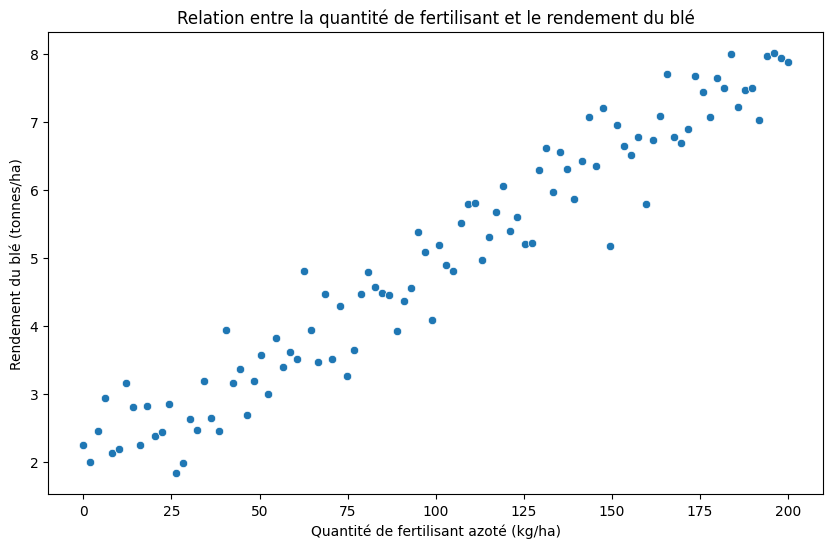

In [5]:
# Graphique de dispersion entre Fertilizer et Yield
plt.figure(figsize=(10,6))
sns.scatterplot(x='Fertilizer', y='Yield', data=data)
plt.title('Relation entre la quantité de fertilisant et le rendement du blé')
plt.xlabel('Quantité de fertilisant azoté (kg/ha)')
plt.ylabel('Rendement du blé (tonnes/ha)')
plt.show()

## 5. Préparation des Données

### Séparation des Variables

```python
# Variable indépendante (explicative)
X = data[['Fertilizer']]

# Variable dépendante (cible)
y = data['Yield']
```

### Division en Ensembles d'Entraînement et de Test

```python
# Division des données (70% entraînement, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```

#### Lien vers la Documentation :

- **train_test_split** : [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

---

In [6]:
# Variable indépendante (explicative)
X = data[['Fertilizer']]

# Variable dépendante (cible)
y = data['Yield']

# Division des données (70% entraînement, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6. Création et Entraînement du Modèle

```python
# Initialisation du modèle
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Affichage des coefficients
print("Coefficient (pente) :", model.coef_[0])
print("Ordonnée à l'origine :", model.intercept_)
```

#### Lien vers la Documentation :

- **LinearRegression** : [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

**Interprétation** : Le coefficient indique que pour chaque augmentation de 1 kg/ha de fertilisant azoté, le rendement du blé augmente en moyenne de *coef* tonnes/ha, toutes choses égales par ailleurs.

---

In [7]:
# Initialisation du modèle
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Affichage des coefficients
print("Coefficient (pente) :", model.coef_[0])
print("Ordonnée à l'origine :", model.intercept_)

Coefficient (pente) : 0.030323930432930284
Ordonnée à l'origine : 1.9030431676616795


## 7. Prédictions et Évaluation du Modèle

### Prédictions

```python
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
```

### Évaluation du Modèle

```python
# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print("Erreur Quadratique Moyenne (MSE) :", mse)
print("Erreur Absolue Moyenne (MAE) :", mae)
print("Coefficient de Détermination (R²) :", r2)
```

#### Liens vers les Documentations :

- **mean_squared_error** : [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
- **mean_absolute_error** : [sklearn.metrics.mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
- **r2_score** : [sklearn.metrics.r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

**Interprétation** :

- **MSE** : Indique la variance des erreurs. Une valeur plus faible est préférable.
- **MAE** : Représente l'erreur moyenne absolue entre les prédictions et les valeurs réelles.
- **R²** : Mesure la proportion de la variance expliquée par le modèle. Une valeur proche de 1 indique un bon ajustement.

---

In [8]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print("Erreur Quadratique Moyenne (MSE) :", mse)
print("Erreur Absolue Moyenne (MAE) :", mae)
print("Coefficient de Détermination (R²) :", r2)

Erreur Quadratique Moyenne (MSE) : 0.13871578462164724
Erreur Absolue Moyenne (MAE) : 0.2917276949413921
Coefficient de Détermination (R²) : 0.9568721873340912


## 8. Visualisation des Résultats

### Ligne de Régression

```python
# Visualisation de la ligne de régression sur les données d'entraînement
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train['Fertilizer'], y=y_train, label='Données d\'entraînement')
sns.lineplot(x=X_train['Fertilizer'], y=model.predict(X_train), color='red', label='Ligne de régression')
plt.title('Régression linéaire sur l\'ensemble d\'entraînement')
plt.xlabel('Quantité de fertilisant azoté (kg/ha)')
plt.ylabel('Rendement du blé (tonnes/ha)')
plt.legend()
plt.show()
```

### Comparaison des Valeurs Réelles et Prédites

```python
# Comparaison sur l'ensemble de test
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test['Fertilizer'], y=y_test, label='Valeurs réelles')
sns.scatterplot(x=X_test['Fertilizer'], y=y_pred, color='red', label='Prédictions')
plt.title('Comparaison des valeurs réelles et prédites')
plt.xlabel('Quantité de fertilisant azoté (kg/ha)')
plt.ylabel('Rendement du blé (tonnes/ha)')
plt.legend()
plt.show()
```

---

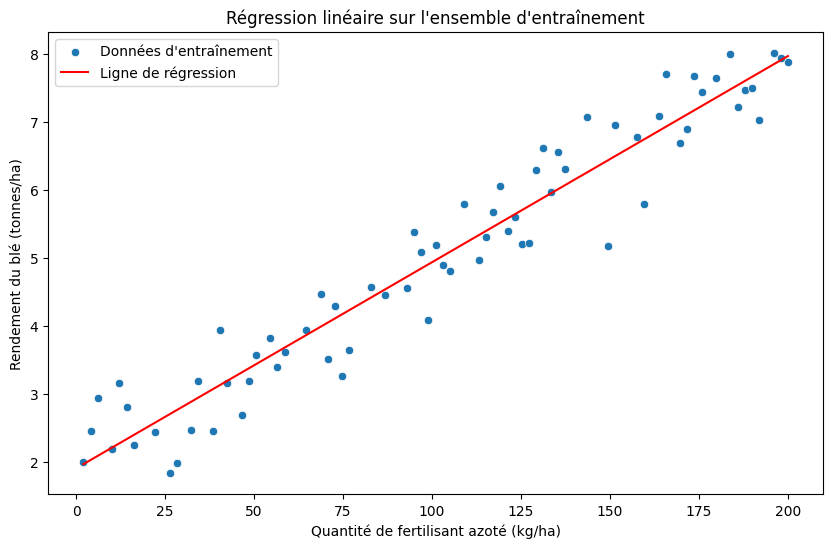

In [9]:
# Visualisation de la ligne de régression sur les données d'entraînement
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train['Fertilizer'], y=y_train, label='Données d\'entraînement')
sns.lineplot(x=X_train['Fertilizer'], y=model.predict(X_train), color='red', label='Ligne de régression')
plt.title('Régression linéaire sur l\'ensemble d\'entraînement')
plt.xlabel('Quantité de fertilisant azoté (kg/ha)')
plt.ylabel('Rendement du blé (tonnes/ha)')
plt.legend()
plt.show()

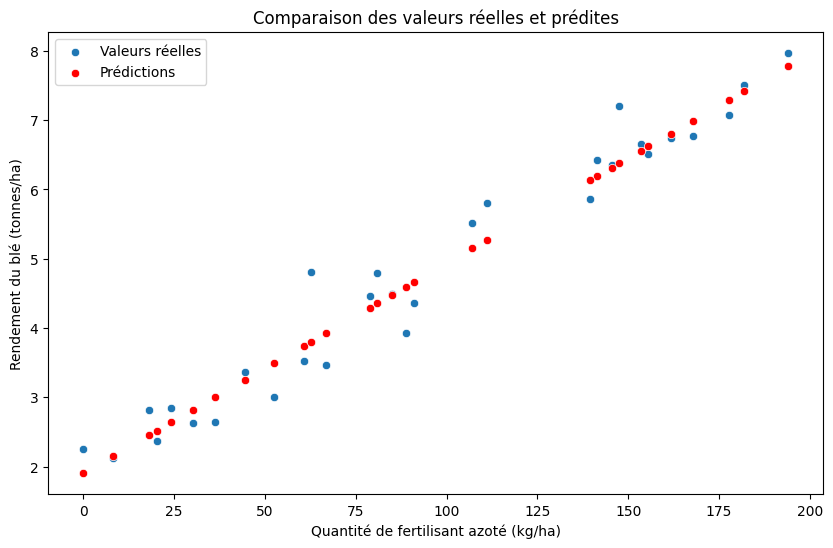

In [10]:
# Comparaison sur l'ensemble de test
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test['Fertilizer'], y=y_test, label='Valeurs réelles')
sns.scatterplot(x=X_test['Fertilizer'], y=y_pred, color='red', label='Prédictions')
plt.title('Comparaison des valeurs réelles et prédites')
plt.xlabel('Quantité de fertilisant azoté (kg/ha)')
plt.ylabel('Rendement du blé (tonnes/ha)')
plt.legend()
plt.show()

## 9. Analyse des Résidus

```python
# Calcul des résidus
residuals = y_test - y_pred

# Graphique des résidus
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Graphique des Résidus')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()
```

**Interprétation** : Les résidus devraient être répartis aléatoirement autour de zéro. Si ce n'est pas le cas, cela peut indiquer que le modèle linéaire n'est pas approprié et qu'un modèle non linéaire pourrait mieux convenir.

---

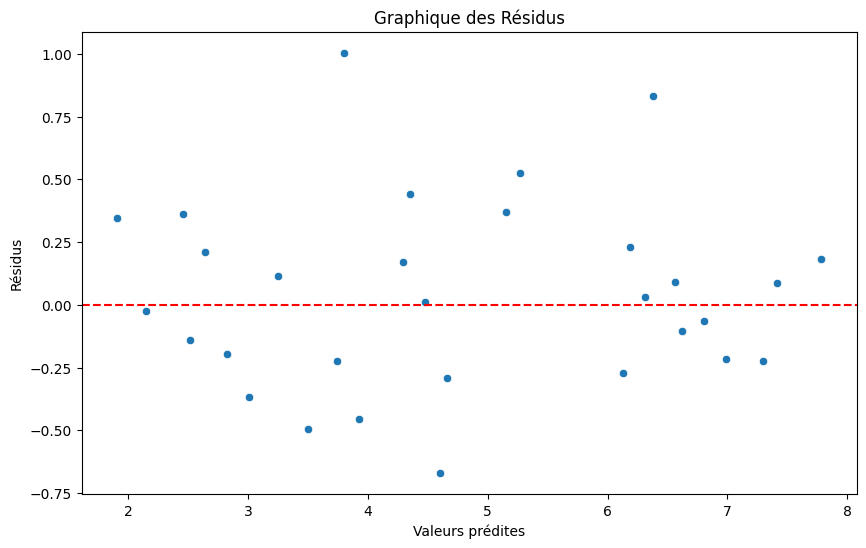

In [11]:
# Calcul des résidus
residuals = y_test - y_pred

# Graphique des résidus
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Graphique des Résidus')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()

## 10. Conclusion

Dans ce notebook, nous avons :

- **Exploré** la relation entre la quantité de fertilisant azoté appliquée et le rendement du blé.
- **Construit** un modèle de régression linéaire simple pour prédire le rendement en fonction de la quantité de fertilisant.
- **Évalué** les performances du modèle avec des métriques telles que MSE, MAE et R².
- **Visualisé** les résultats pour comprendre l'ajustement du modèle.
- **Analysé** les résidus pour vérifier les hypothèses du modèle.

**Limites du Modèle** :

- La relation entre le fertilisant et le rendement peut ne pas être strictement linéaire sur toute la plage des données.
- D'autres facteurs influencent le rendement (conditions météorologiques, qualité du sol, pratiques agricoles) et ne sont pas pris en compte ici.

**Perspectives** :

- **Étendre** l'analyse à une régression linéaire multiple en incluant d'autres variables explicatives pertinentes.
- **Tester** des modèles non linéaires ou des transformations de variables.
- **Collecter** des données supplémentaires pour améliorer la robustesse du modèle.

---

**Auteur :** Omar Kennouche, fondateur de **AI Nexus One**

*Merci d'avoir suivi ce guide ! N'hésitez pas à approfondir votre exploration et à appliquer ces techniques à vos propres données agricoles.*

---

### Remarques Supplémentaires

- **Documentation des Fonctions Utilisées** : Consultez les liens fournis pour accéder aux documentations officielles et approfondir votre compréhension.
- **Mises à Jour** : Assurez-vous d'utiliser des versions récentes des bibliothèques pour bénéficier des dernières fonctionnalités.

---

### Conseils Pédagogiques

- **Clarté et Simplicité** : Les explications sont rédigées pour faciliter la compréhension.
- **Bonnes Pratiques** : Le code est structuré et commenté selon les conventions standards.
- **Interactivité** : Les visualisations illustrent les relations et rendent l'apprentissage plus engageant.
- **Références** : Les liens vers les documentations encouragent les étudiants à approfondir leurs connaissances.

---